# MULTIPLE LINEAR REGRESSION

In [1]:
from sklearn.datasets import fetch_california_housing

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
df = pd.read_csv('housing.csv')

In [131]:
df = df.iloc[:,:-1]

In [133]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [135]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


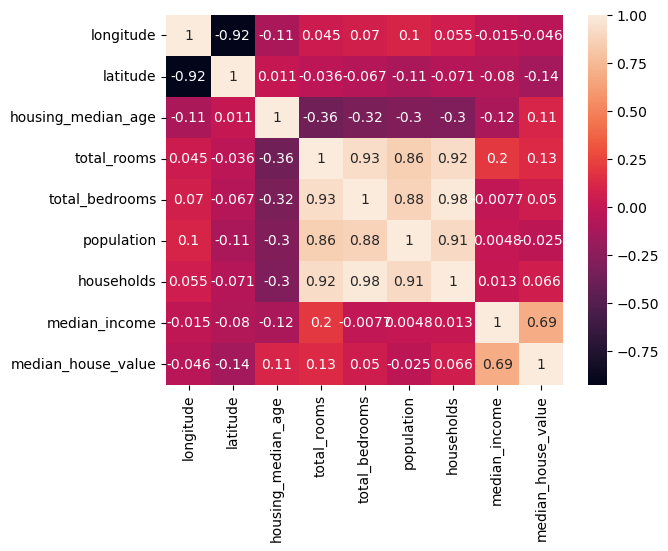

In [137]:
sns.heatmap(df.corr() , annot=True)
plt.show()

In [139]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [141]:
df = df.dropna()

In [143]:
X = df.iloc[:,:-1] # independent features

In [145]:
y = df.iloc[:,-1] # dependent features

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [151]:
X_train.shape, y_train.shape

((13690, 8), (13690,))

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [155]:
X_train_scaled = scaler.fit_transform(X_train)

In [157]:
X_test_scaled = scaler.transform(X_test)

# model training

In [160]:
from sklearn.linear_model import LinearRegression

In [162]:
regression = LinearRegression()

In [164]:
regression.fit(X_train_scaled, y_train)

LinearRegression()

In [166]:
regression.coef_   

array([-85289.13320676, -91329.81365477,  15050.64380086, -15153.73295298,
        43592.89402466, -40740.79364718,  17410.52130471,  76150.32402162])

In [168]:
regression.intercept_

206572.19393718042

In [170]:
## Prediction

In [174]:
y_pred = regression.predict(X_test)

C:\Users\sumar\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [176]:
y_pred

array([-48691755.65461213, -48215942.27727355, -18390496.00575551, ...,
       -44022379.38068748,   5802445.06420468, -64283750.04615093])

In [178]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

6393977358135402.0
58744925.19421627
79962349.62865587


In [180]:
# r2 and adjusted r2

In [182]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

-483006.70535790676


In [184]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-483580.51908568566

# assumptions

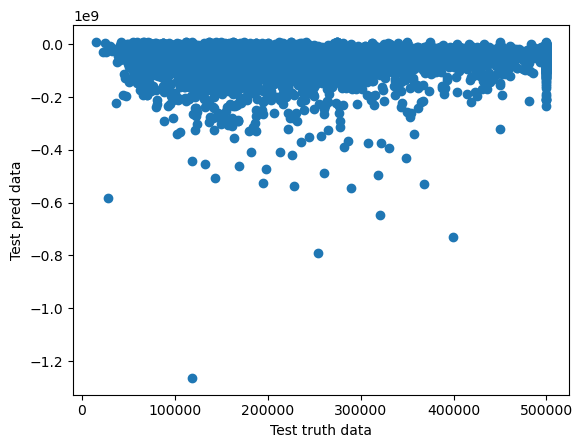

In [193]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test truth data')
plt.ylabel('Test pred data')
plt.show()
#this should follow linear path of y=mx+c

In [195]:
residuals = y_test-y_pred

C:\Users\sumar\AppData\Local\Temp\ipykernel_22176\3079906372.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


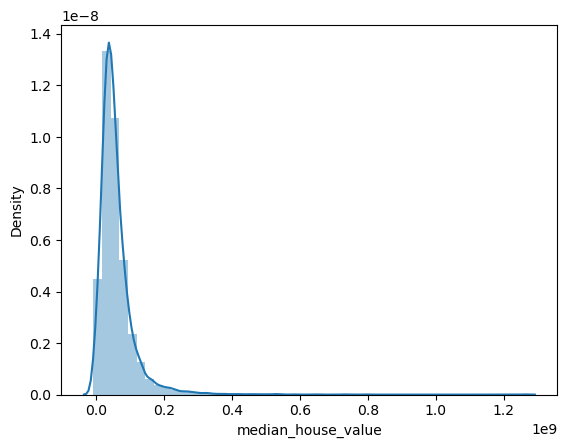

In [201]:
sns.distplot(residuals)
plt.show()
# this plot should follow normal distribution

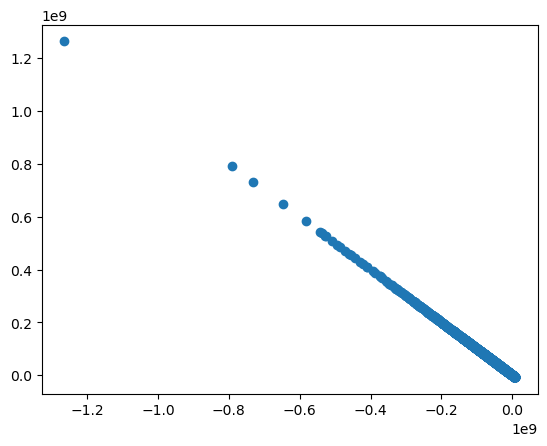

In [211]:
plt.scatter(y_pred, residuals)
plt.show()
# should follow uniform dist --> all point scattered all over figsize everywhere

# deployment

In [216]:
import pickle

In [228]:
pickle.dump(regression, open('regression.pkl', 'wb'))

In [ ]:
pickle.load()